In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
#import dataset
wine = pd.read_csv('winequality-red.csv',sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#data preprocessing
bins = (2,6.5,8)
group_names = ['bad','good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

[bad, good]
Categories (2, object): [bad < good]

In [7]:
label_quality = LabelEncoder()

In [8]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [9]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [10]:
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

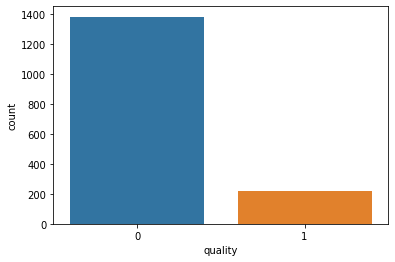

In [11]:
sns.countplot(wine['quality'])

In [12]:
#now seperate the dataset as response variable and feature variable
#ie what info we are given and what we are looking for
#X = the features we have / info given
#y = what we are looking for or the response variable
X = wine.drop('quality', axis = 1)
y = wine['quality']

In [13]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#Apply standard scaling to get optimized results
#needed if dataset values are in each colomb are drastically different
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [15]:
X_train[:10]

array([[ 0.21833164,  0.88971201,  0.19209222,  0.30972563, -0.04964208,
         0.69100692,  1.04293362,  1.84669643,  1.09349989,  0.45822284,
         1.12317723],
       [-1.29016623, -1.78878251,  0.65275338, -0.80507963, -0.45521361,
         2.38847304,  3.59387025, -3.00449133, -0.40043872, -0.40119696,
         1.40827174],
       [ 1.49475291, -0.78434707,  1.01104539, -0.52637831,  0.59927236,
        -0.95796016, -0.99174203,  0.76865471, -0.07566946,  0.51551749,
        -0.58738978],
       [ 0.27635078,  0.86181102, -0.06383064, -0.66572897, -0.00908493,
         0.01202048, -0.71842739,  0.08948842,  0.05423824, -1.08873281,
        -0.96751578],
       [ 0.04427419,  2.81487994, -0.62686095,  2.39998549, -0.31326357,
        -0.47296984,  0.2229897 ,  1.1998714 ,  0.37900751, -0.9741435 ,
        -0.49235828],
       [-0.07176411, -0.78434707,  1.11341454, -0.17800167,  0.21397941,
         3.01896045,  2.62208486,  0.60694845,  0.44396136,  1.89058918,
        -0.587

In [16]:
#Random Forest Classifier
#n_estimators is the value you can mess with which chooses the amount
#of trees start big work to small
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train) #fit our training data to forest
pred_rfc = rfc.predict(X_test) #prediction

In [17]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [18]:
#Lets see how our model preformed
print(classification_report(y_test, pred_rfc)) #Shows accuracy of model
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       273
           1       0.73      0.51      0.60        47

    accuracy                           0.90       320
   macro avg       0.82      0.74      0.77       320
weighted avg       0.89      0.90      0.89       320

[[264   9]
 [ 23  24]]


In [19]:
#SVM Classifier
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [20]:
#Lets see how our model preformed
print(classification_report(y_test, pred_clf)) #Shows accuracy of model
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

[[268   5]
 [ 35  12]]


In [21]:
#Neural Network
mlpc = MLPClassifier(hidden_layer_sizes = (11,11,11), max_iter = 1500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [22]:
#Lets see how our model preformed
print(classification_report(y_test, pred_mlpc)) #Shows accuracy of model
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       273
           1       0.67      0.55      0.60        47

    accuracy                           0.89       320
   macro avg       0.80      0.75      0.77       320
weighted avg       0.89      0.89      0.89       320

[[260  13]
 [ 21  26]]


In [23]:
#accuracy score of rfc
cm = accuracy_score(y_test, pred_rfc)
cm

0.9

In [24]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [25]:
Xnew = [[7.4,0.5666,0.01,2.0,0.065,15.5,21.0,0.9946,3.36,0.47,10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

array([0])

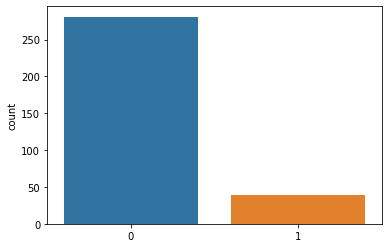

In [26]:
sns.countplot(mlpc.predict(X_test))